<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?# A:

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

# Solution Report

1. Understanding the Data
    2. Initial Data Cleaning
    
        2.1 Numerical Features
            2.1.1 Dealing with Missing Values (numeric)
            2.1.2 Multicollinearity (numeric)
            2.1.3 Impute Missing Values (numeric)
            2.1.4 Initial EDA (numeric)
        2.2 Categorical Features
            2.2.1 Dealing with Missing Values (Categorical)
            2.2.2 Impute Missing values (Categorical)
            2.2.3. Initial EDA (categorical)
                2.2.3.1. One Hot encoding for qualitative categorical
                2.2.3.2. EDA on qualitative categorical
                2.2.3.3. EDA on ordinal categorical
                

## 1.Understanding The Data

In [1]:
## import libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

##for prediction model & encoding
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
house = pd.read_csv('./housing.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Issues within the data

#### Separation between fixed and renovatable dataset
we will need to separate between fixed and renovatable dataset to find out the changes in renovatable variables toward sale price later on.


#### **Data Type**
we can see that out of 79 variable features, 43 of them are object data type and the rest are integer. 
first we will divide the dataframe into integer features and categorical features and do data cleaning separatedly (both will have SalePrice variable as target variable)

for integer variables we will deal with the missing data, multicollinearity between int variables and impute null values,the conduct eda for int features

for categorical data 
we can divide these object datatype variable into 2 type:
**nominal categorical** data and **ordinal categorical** data. 
- Nq example : Foundation -> type of foundation: Brick&tile, cinder block, slab, stone, wood
- Oq example : Basement condition ->  Excellent, good, typical, fair, poor, no basement

first we will deal with nominal categorical data, and do We will do **label encoding**: e.g (5,4,3,2,1) for variable with ranking qualitative from excellent to poor or zero. after that we will conduct EDA on these set.

But for the ordinal qualitative, we will do **One Hot Encoding** to the variables on the model prediction stage, to make the process less messy. before that we will only conduct EDA on these set as well.

#### **Missing Values**
we will remove variables which have missing more than 45%
when we read the variable descriptions, we can say that most of NaN information means thatn the house doesnt have that particular feature or facility, in that sense we can replace NA with 0.

####  Removing Non-residential data Record

MSZoning: Identifies the general zoning classification of the sale.
we will need to remove the agricultur, commercial & industrial one
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

residential = 'FV','RH', 'RL', 'RM', 'RP'

In [53]:
# remove non-residential 
house = house[house.MSZoning.isin(['FV','RH', 'RL', 'RM', 'RP'])].copy()

In [54]:
house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

Checking on Target Variable: SalePrice Distribution 

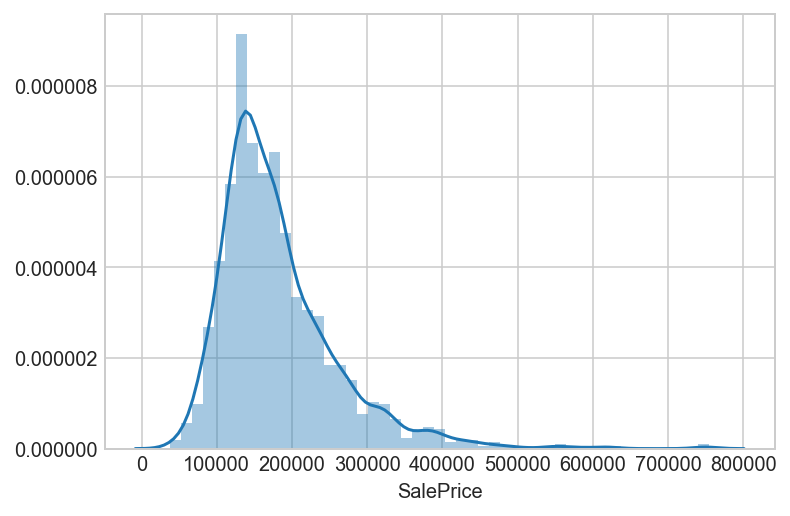

In [55]:
sns.distplot(house.SalePrice)

As we can see that SalePricehave a skewed distribution.
ultiple regression works most reliably when the inputs come in a form that is well-known. The “form” we’re talking about is the distribution of the data. If the distribution of your data approximates that of a theoretical probability distribution, we can perform calculations on the data that are based on assumptions we can make about the well-known theoretical distribution. 

In order to make the variable better fit the assumptions underlying regression, we need to transform it. There are a number of ways to do this, but the most common for our purposes is to take the log of ‘SalePrice’


In [56]:
import math
house['LogPrice'] = house.SalePrice.map(math.log)

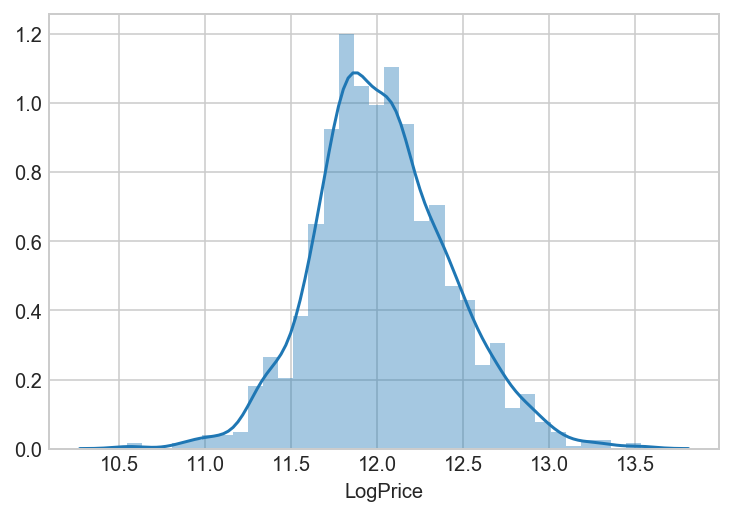

In [57]:
sns.distplot(house.LogPrice)


                
                
# 1. Understanding the Data
After separation between fixed and renovatable features, now we have 60 columns w with 36 numeric variables and 24 categorical variables.



## 2. Separated Fixed Features Dataset and Renovatable Features Dataset
This housing data has 1460 observations and 81 variables with SalePrice and SaleCondition as the target variable.

fixed_df  = characteristics of the house that cannot be renovated.
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

renovatable_df = characteristics of the house that cannot be renovated.
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components



SalePrice will be the target variable for problem 1 and problem 2, and SaleCondition will be target variable for problem 3. 

obviously that 1460 record with 81 variables are too much variable and may lead into overfitting.and we need to reduce the variables

In [58]:
## renovatable is all features with 'roof', 'exterior','quality','conditions', 'heating', 'elecrtical','veneer' measures
renovatable = ['OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl' , 'Exterior1st' , 'Exterior2nd', 'MasVnrType', 
                    'ExterQual', 'ExterCond','BsmtCond','Heating', 'HeatingQC', 
                  'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fireplaces', 
                  'FireplaceQu','GarageQual', 'GarageCond', 'PoolQC', 'Fence' ]

target = ["MoSold","YrSold", "SaleCondition","SalePrice"]
  

#Basement qual is unrenovatable because it evaluates the height of the basement

In [10]:
renovatable_df =pd.concat([house[renovatable], house[target]], axis=1)
renovatable_df.head() 

,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,BsmtCond,...,Fireplaces,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence,MoSold,YrSold,SaleCondition,SalePrice
0,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,TA,...,0,NaN,TA,TA,NaN,NaN,2,2008,Normal,208500
1,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,TA,...,1,TA,TA,TA,NaN,NaN,5,2007,Normal,181500
2,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,TA,...,1,TA,TA,TA,NaN,NaN,9,2008,Normal,223500
3,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,Gd,...,1,Gd,TA,TA,NaN,NaN,2,2006,Abnorml,140000
4,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,TA,...,1,TA,TA,TA,NaN,NaN,12,2008,Normal,250000


In [11]:
fixed_columns = [x for x in house.columns if x not in renovatable ]
fixed_df = house[fixed_columns].copy()
fixed_df = fixed_df.drop(['LogPrice'], axis=1)
fixed_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


# Start working on the fixed features dataset

In [12]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     1423 no

# 2. Initial EDA

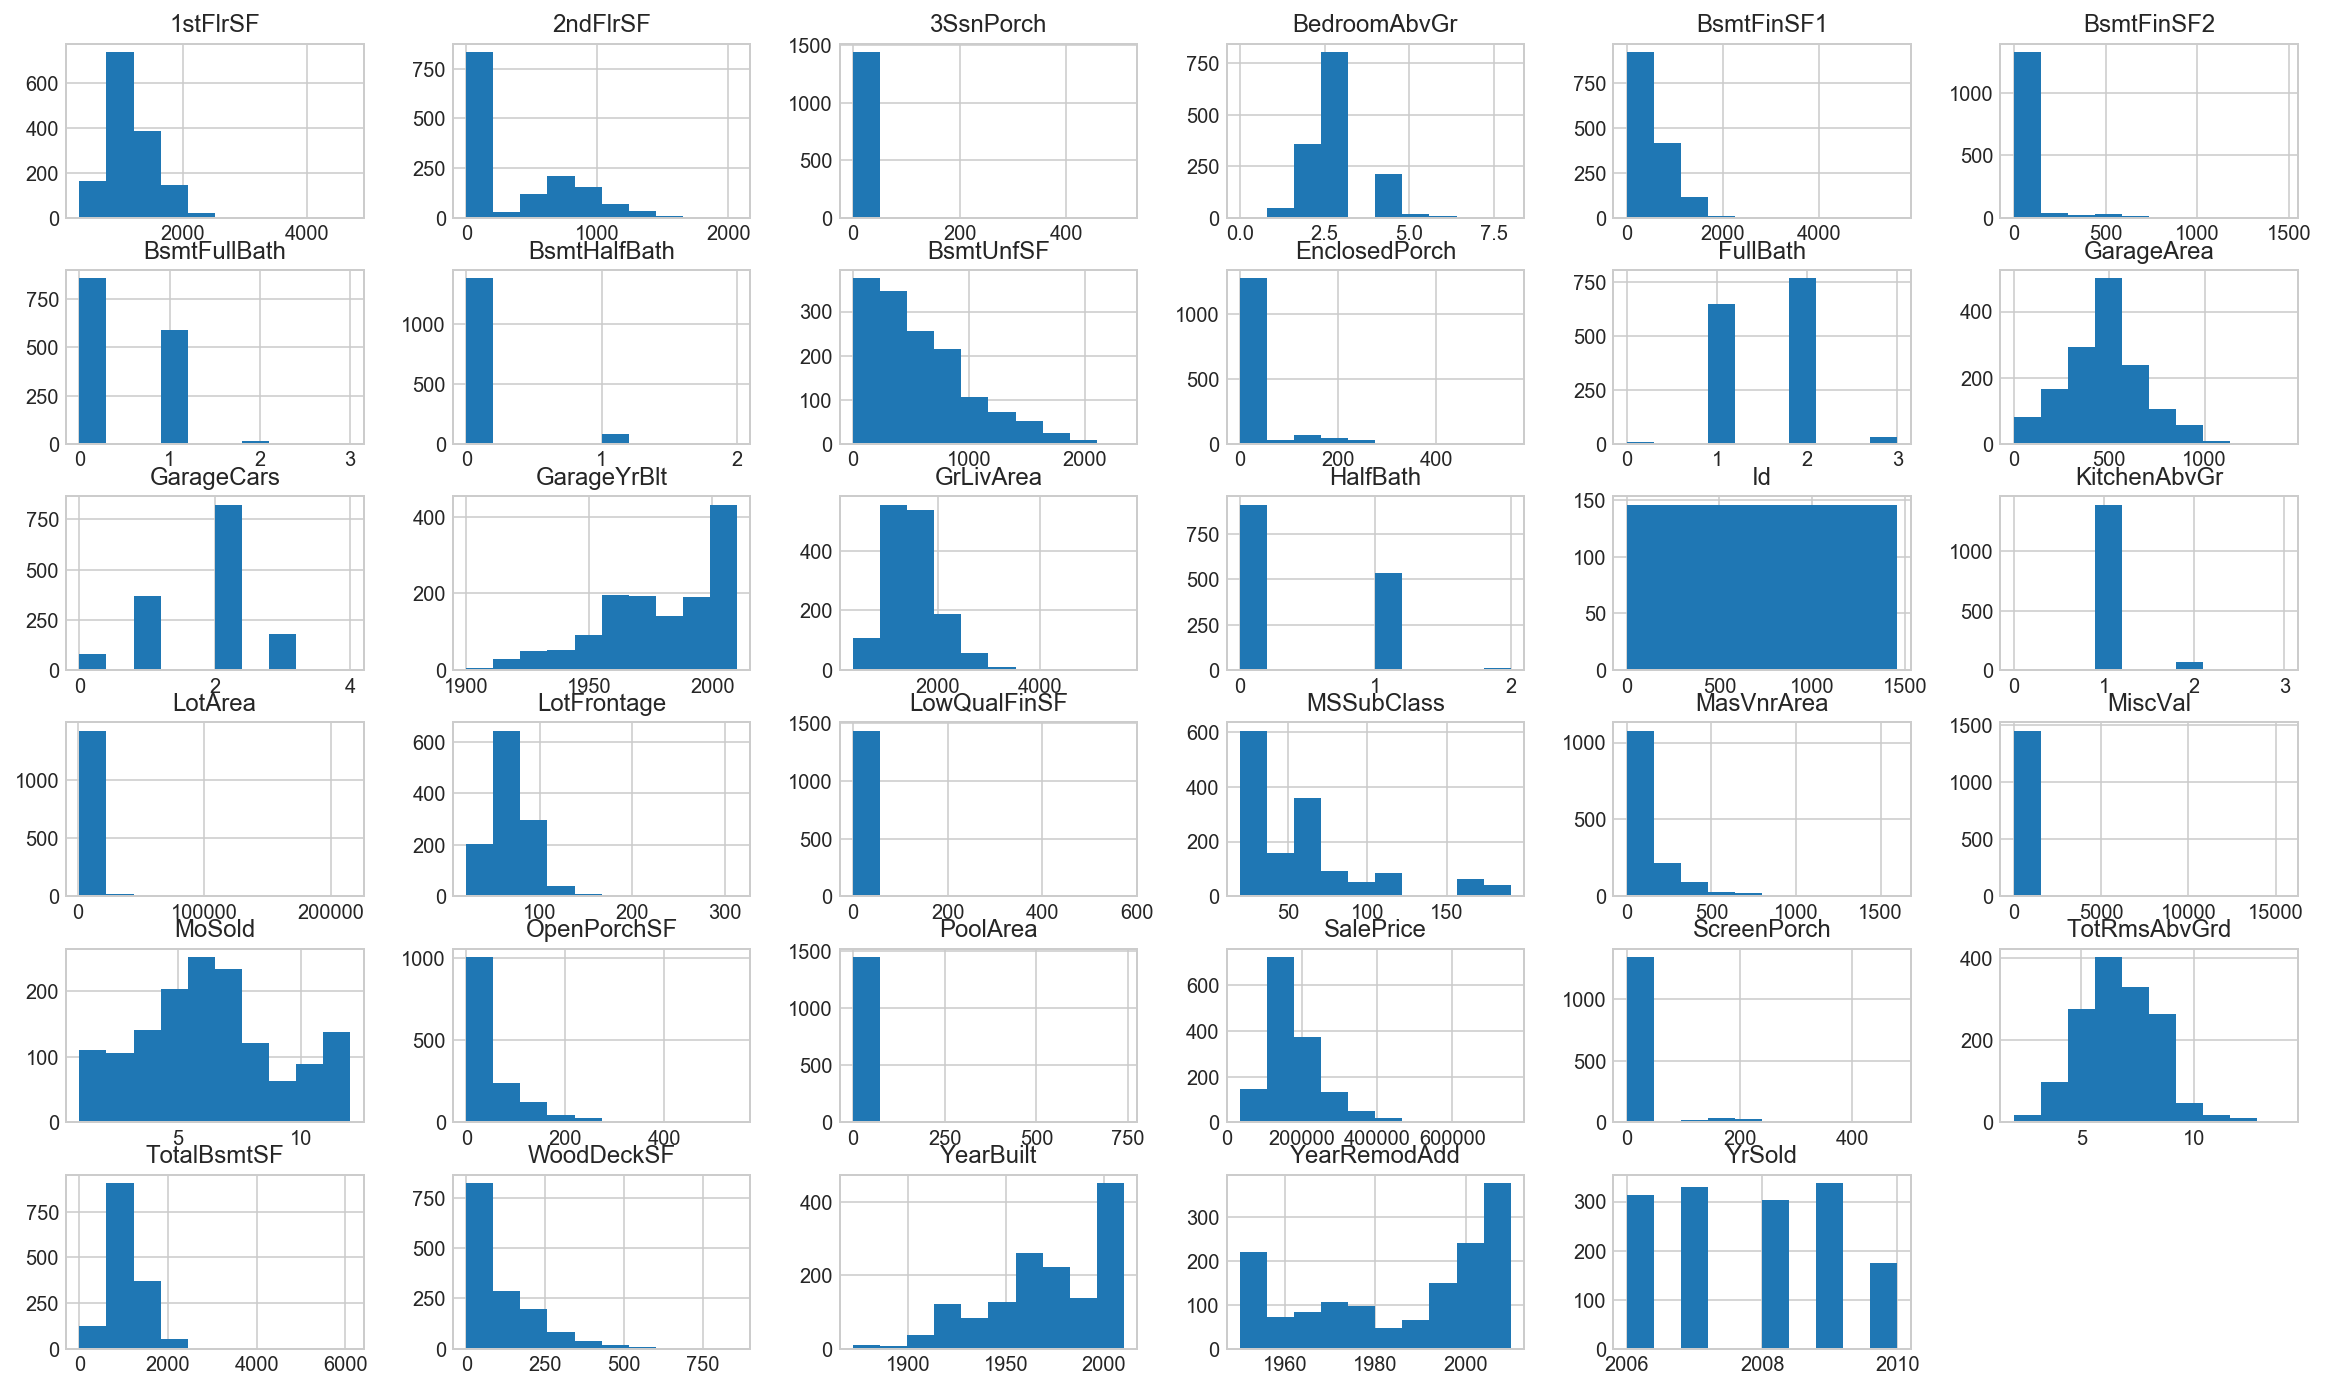

In [13]:
_= fixed_df.hist(figsize = (20,12))

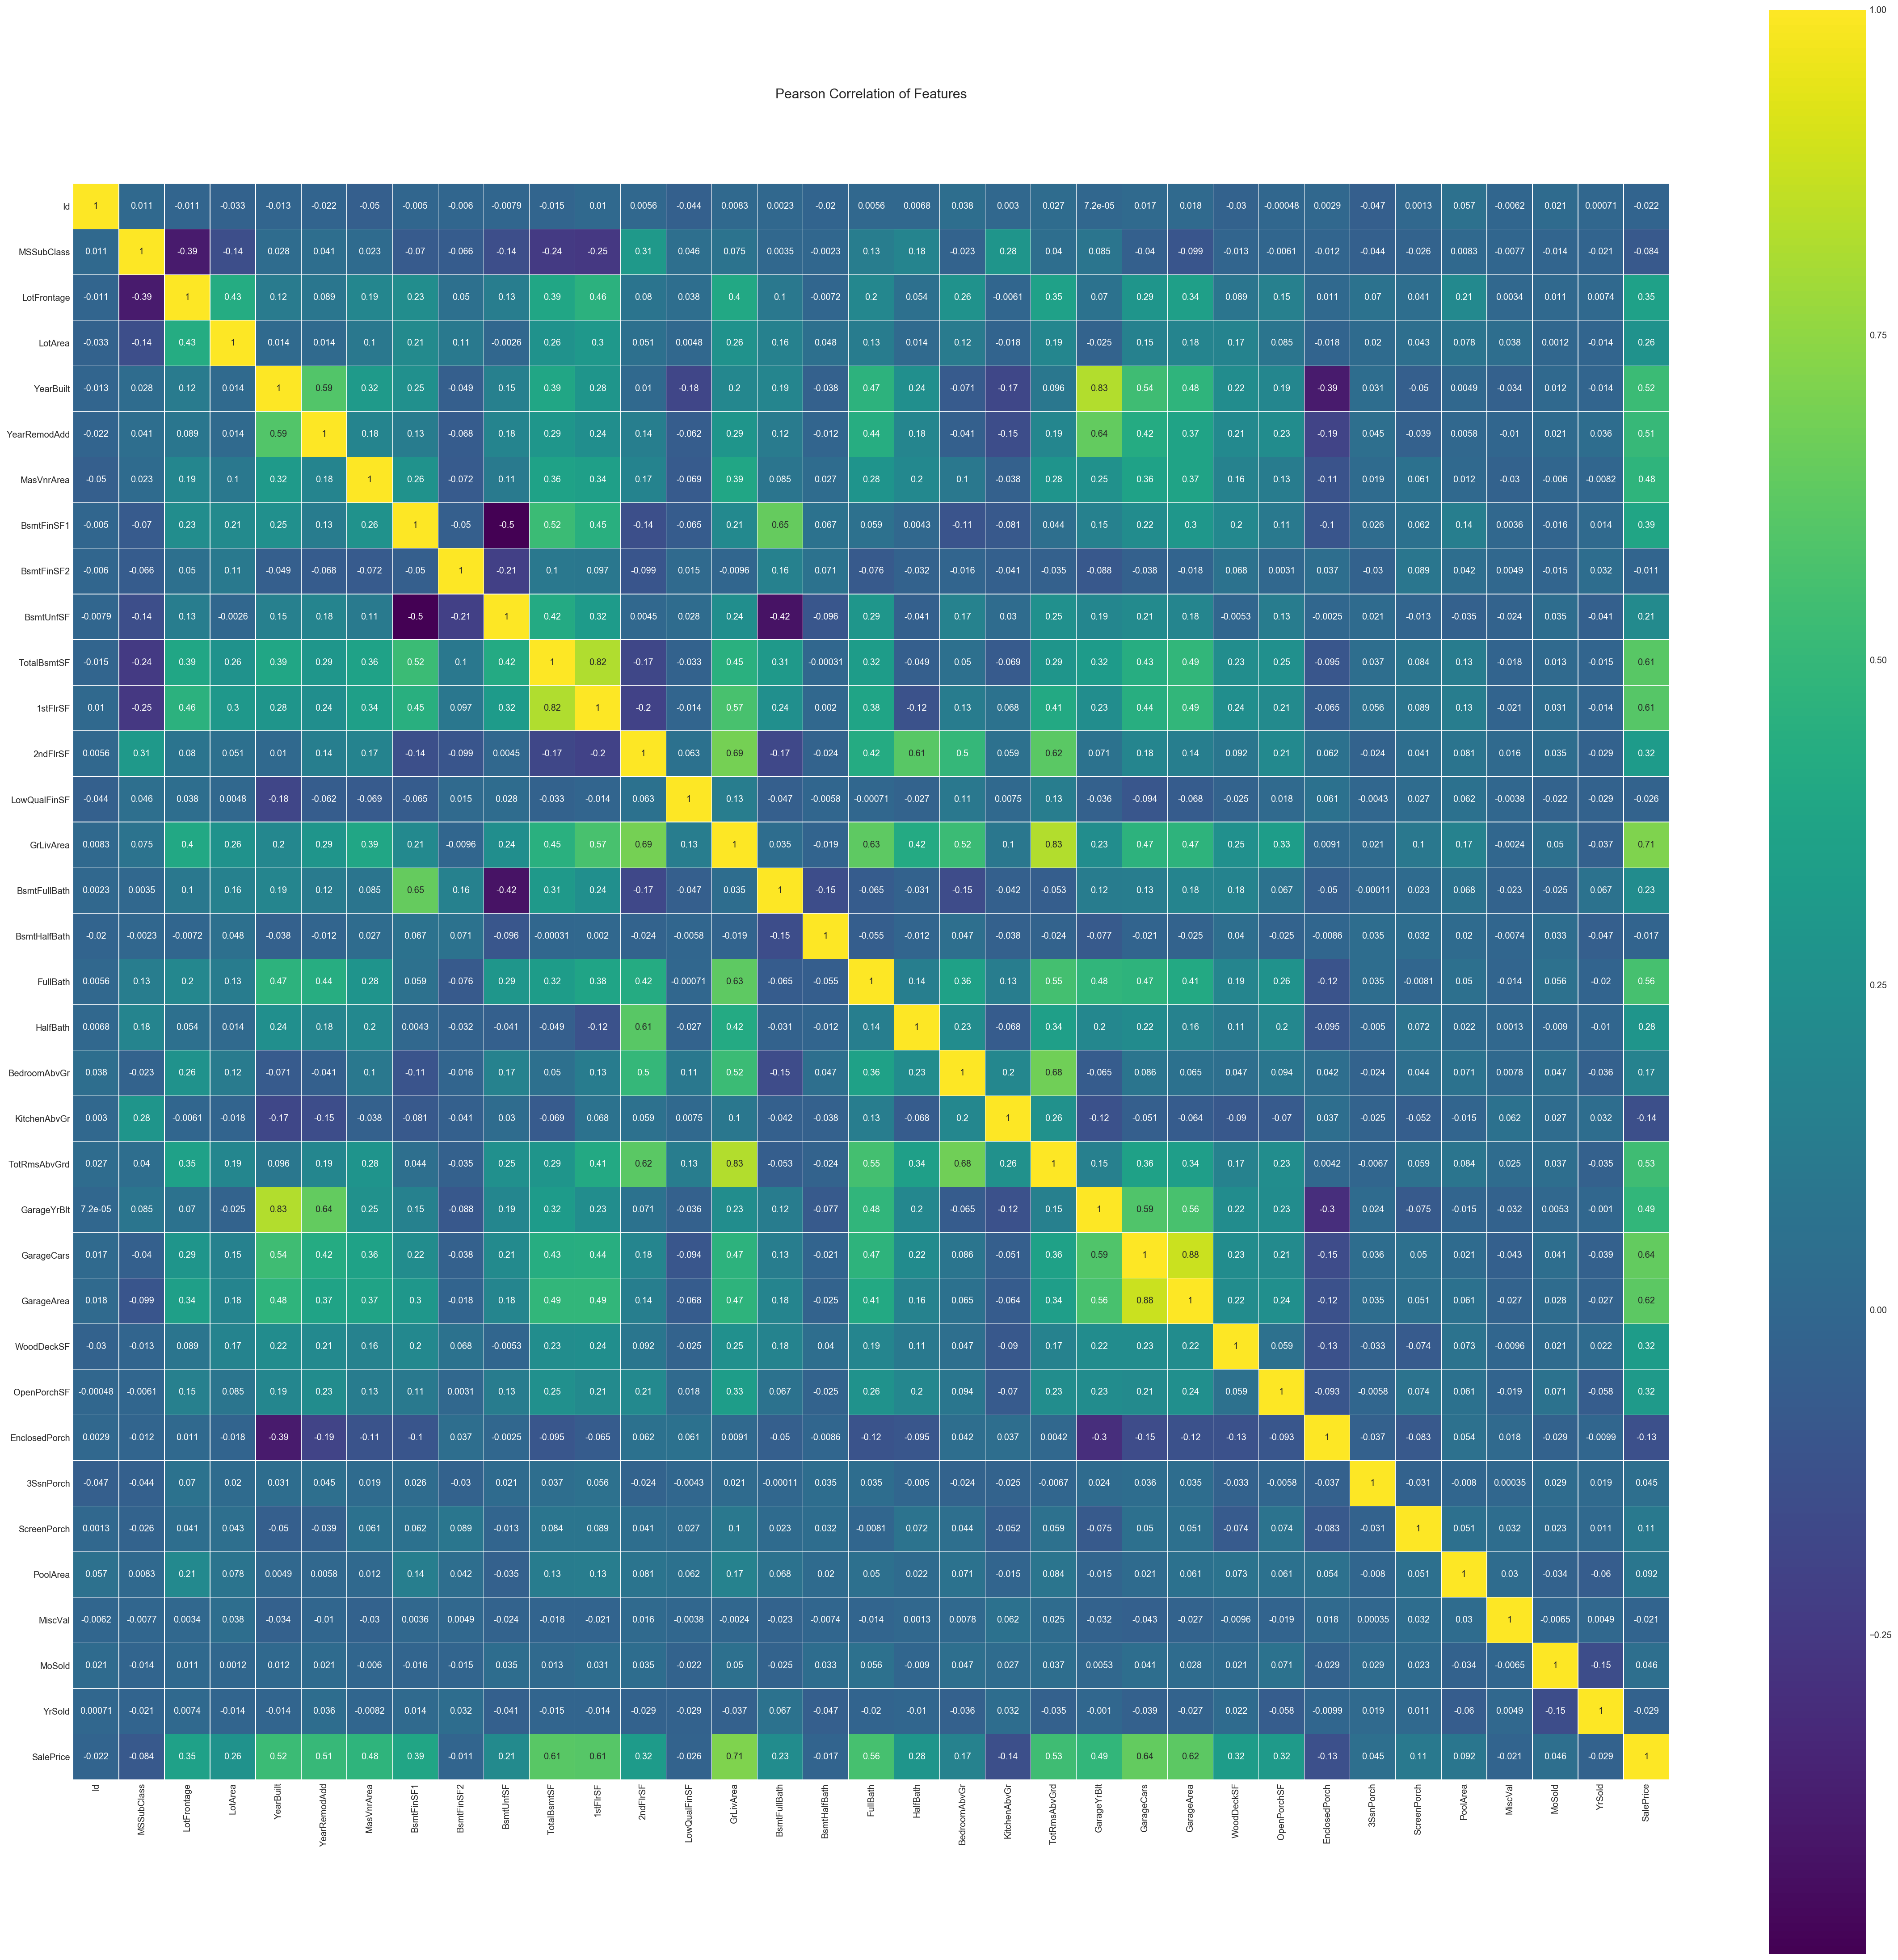

In [14]:
#Checking The correlation for multicollinearity purpose
##doubleclick to see the image
colormap = plt.cm.viridis
_=plt.figure(figsize=(40,40))
_=plt.title('Pearson Correlation of Features', y=1.05, size=15)
_=sns.heatmap(fixed_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [31]:
# Create correlation dataframe
corr_df = fixed_df.corr()

# Create a dataframe for the SalePrice correlation only
sale_price_df = corr_df["SalePrice"]
sale_price_df

# Remove references to any SalePrice column or row in correlation dataframe
corr_df = corr_df.drop('SalePrice', 1)
corr_df = corr_df.drop(['SalePrice'])

all_lists = []
# Filter through correlations to find correlation sets greater than the significant correlation value (scv)
def find_all_correlations_of_interest(df, scv):
    all_lists = []
    for column, series in df.iteritems():
        for item_in_series in series.iteritems():
            variable, value = item_in_series
            if ((value >= scv) or (value <= -(scv))) and (value != 1):
                correlation = [column, variable]
                correlation.sort()
                correlation.append(value)
                all_lists.append(correlation)
    return all_lists
            
            
# Function to remove duplicate duplication correlation sets
def return_only_unique_correlations(list_with_duplicates):
    output = []
    for item in list_with_duplicates:
        if item not in output:
            output.append(item)
    return output


# Function to check the multicollinearity against the sales price
def multicollinearity_correlations_against_y_corr(unique_corr, y_corr):
    for items in unique_corr:
        column_sp_corr = y_corr[items[0]]
        variable_sp_corr = y_corr[items[1]]
        if column_sp_corr < variable_sp_corr:
            eliminate_variable = items[0]
        else:
            eliminate_variable = items[1]
        print items, '-> eliminate', eliminate_variable


# Function to check sale price correlations of significant correlation values 
def check_correlations_against_y_corr_only(df, scv):
    for key, value in df.iteritems():
        if ((value >= scv) or (value <= -(scv))) and value != 1 :
            print key, value

            
print "========== Multicollinearity Correlations Against Sales Price =========="
correlations_of_interest = find_all_correlations_of_interest(corr_df, 0.60)
unique_correlations = return_only_unique_correlations(all_lists)    
multicollinearity_correlations_against_y_corr(unique_correlations, sale_price_df) 
print ""    
print "========== SalesPrice Correlations Only ======="
check_correlations_against_y_corr_only(sale_price_df, 0.60)

========== Multicollinearity Correlations Against Sales Price ==========

========== SalesPrice Correlations Only =======
1stFlrSF 0.605852184692
GrLivArea 0.708624477613
GarageCars 0.640409197258


just as initial eda, we are taking a look on correlation between integer variables with sale price. just to take a look which variables that we might want to take a look more.

<img src="https://i.imgur.com/dQIf7eu.png" style="float: left">
<img src="https://image.ibb.co/kYtWsm/Screen_Shot_2017_11_23_at_9_56_44_am.png" style="float: left">


My method is by looking at the highly correlated variables to sale price, and check whether they have multicollinearity with other variables, and drop the weaker predictor of SalePrice variables

Int Variables which has high multicollinearity (>=0.68):

1. 1stFlrSF with TotalBsmtSF -> 0.82. Eliminate TotalBsmtSF
2. YearBuilt with GarageYrBlt -> 0.83 Eliminate GarageYrBlt
3. GrLivArea with TotRmsAbvGrd -> 0.68 Eliminate TotRmsAbvGrd 
4. GarageCars with GarageArea -> 0.88 Eliminate GarageArea
5. GrLivArea with 2ndFlrSF -> 0.69 Eliminate 2ndFlrSF

In [16]:
# Drop features with high multicollinearity
fixed_df.drop(['TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','GarageArea','2ndFlrSF'], axis=1, inplace=True)

In [17]:
## Checking the percentage of integer Null values , 1460 is the number of record
null= fixed_df.isnull().sum()/1460
null.sort_values(ascending=False)[0:12]

MiscFeature     0.963014
Alley           0.937671
LotFrontage     0.177397
GarageFinish    0.055479
GarageType      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Foundation      0.000000
Condition1      0.000000
dtype: float64

In [18]:
# Drop features with >20 % missing values
fixed_df.drop(['MiscFeature','Alley'], axis=1, inplace=True)

Numeric variables has mostly filled values. we will check the **Lot Frontage** scatter plot compared with price, whether it's worth to do imputing method for it.

 #LotFrontage: Linear feet of street connected to property

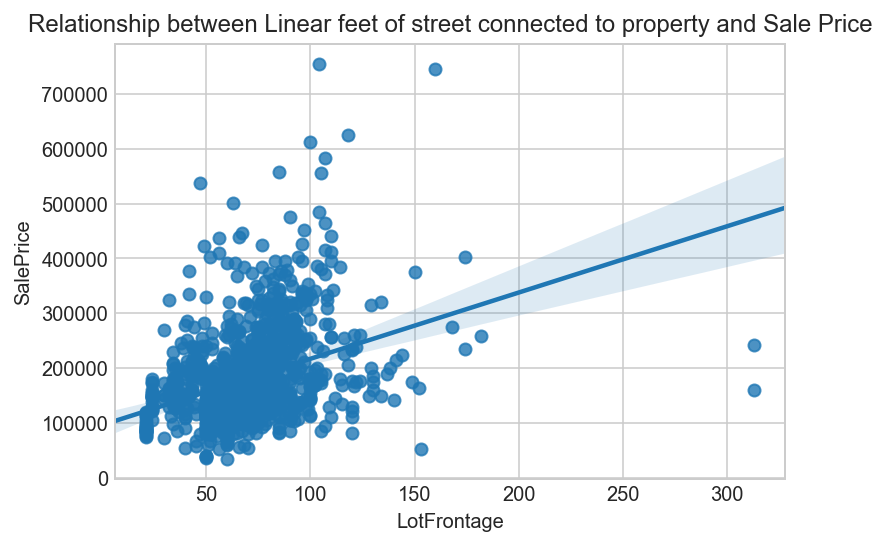

In [19]:
sns.regplot(x="LotFrontage", y="SalePrice", data=fixed_df );
plt.title("Relationship between Linear feet of street connected to property and Sale Price")

it seems lot frontage has some positive correlation within the sale price, then we will keep it for now.

#### LotFrontage, GarageFinish, GarageType, BsmtExposure , BsmtFinType2 , BsmtQual  , BsmtFinType1 , MasVnrArea 

LotFrontage: Linear feet of street connected to property. We will impute the mising va,using using the mean method GarageFinish : NA means no Garage ->"Non-Exist"
GarageFinish : NA means no Garage ->"Non-Exist"
BsmtExposure : NA means no Exposure->"Non-Exist"
BsmtFinType2 : Na means No Basement->"Non-Exist"
BsmtFinType2 : Na means No Basement->"Non-Exist"
MasVnrArea  :  Ne means No Veneer-> "Non-Exist" 

In [20]:
lists = fixed_df[['LotFrontage', 'GarageFinish', 'GarageType', 'BsmtExposure' , 
                  'BsmtFinType2' , 'BsmtQual'  , 'BsmtFinType1' , 'MasVnrArea']]
lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
LotFrontage     1201 non-null float64
GarageFinish    1379 non-null object
GarageType      1379 non-null object
BsmtExposure    1422 non-null object
BsmtFinType2    1422 non-null object
BsmtQual        1423 non-null object
BsmtFinType1    1423 non-null object
MasVnrArea      1452 non-null float64
dtypes: float64(2), object(6)
memory usage: 91.3+ KB


In [32]:
#impute missing values accordingly
_ = fixed_df['LotFrontage'].fillna(0, inplace=True)
_ = fixed_df['MasVnrArea'].fillna(fixed_df['MasVnrArea'].mean(), inplace=True)

_ = fixed_df['GarageFinish'].fillna("No Garage", inplace=True)
_ = fixed_df['GarageType'].fillna("No Garage", inplace=True)
_ = fixed_df['BsmtExposure'].fillna("No Basement", inplace=True)
_ = fixed_df['BsmtFinType1'].fillna("No Basement", inplace=True)
_ = fixed_df['BsmtFinType2'].fillna("No Basement", inplace=True)
_ = fixed_df[ 'BsmtQual'].fillna("No Basement", inplace=True)
_ = fixed_df[ 'BsmtQual'].fillna("No Basement", inplace=True)



In [33]:
# Some numerical features are actually really categories
fixed_df = fixed_df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [34]:
## Checking the percentage of integer Null values , 1460 is the number of record
null= fixed_df.isnull().sum()/1460
null.sort_values(ascending=False)[0:5]

SalePrice        0.0
SaleCondition    0.0
BsmtFinSF1       0.0
BsmtFinType1     0.0
BsmtExposure     0.0
dtype: float64

All features in fixed dataframe are cleaned now.

In [24]:
fixed_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,SC60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,Feb,2008,WD,Normal,208500
1,2,SC20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,May,2007,WD,Normal,181500
2,3,SC60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,Sep,2008,WD,Normal,223500
3,4,SC70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,Feb,2006,WD,Abnorml,140000
4,5,SC60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,Dec,2008,WD,Normal,250000


## PREDICTION

## Fixed Features Dataframe Data Preparation

Now Fixed Character Dataframe has 52 features from the initioal 80 features. Here we will take a look more closely the data before we do prediction. we will check again the multicollinearity within fixed characteristics, and check do more EDA.

For large dataset with many predictor like this dataset. feature selection is very critical to achieve best prediction. there ate several techniques of feature selection:
    
    A. subset selection 
        1. Best Subset
        2. Forward Selection (bottom up)
        3. Backward Selction (top down)
    B. Shrinkage Method
    C. Dimension reduction


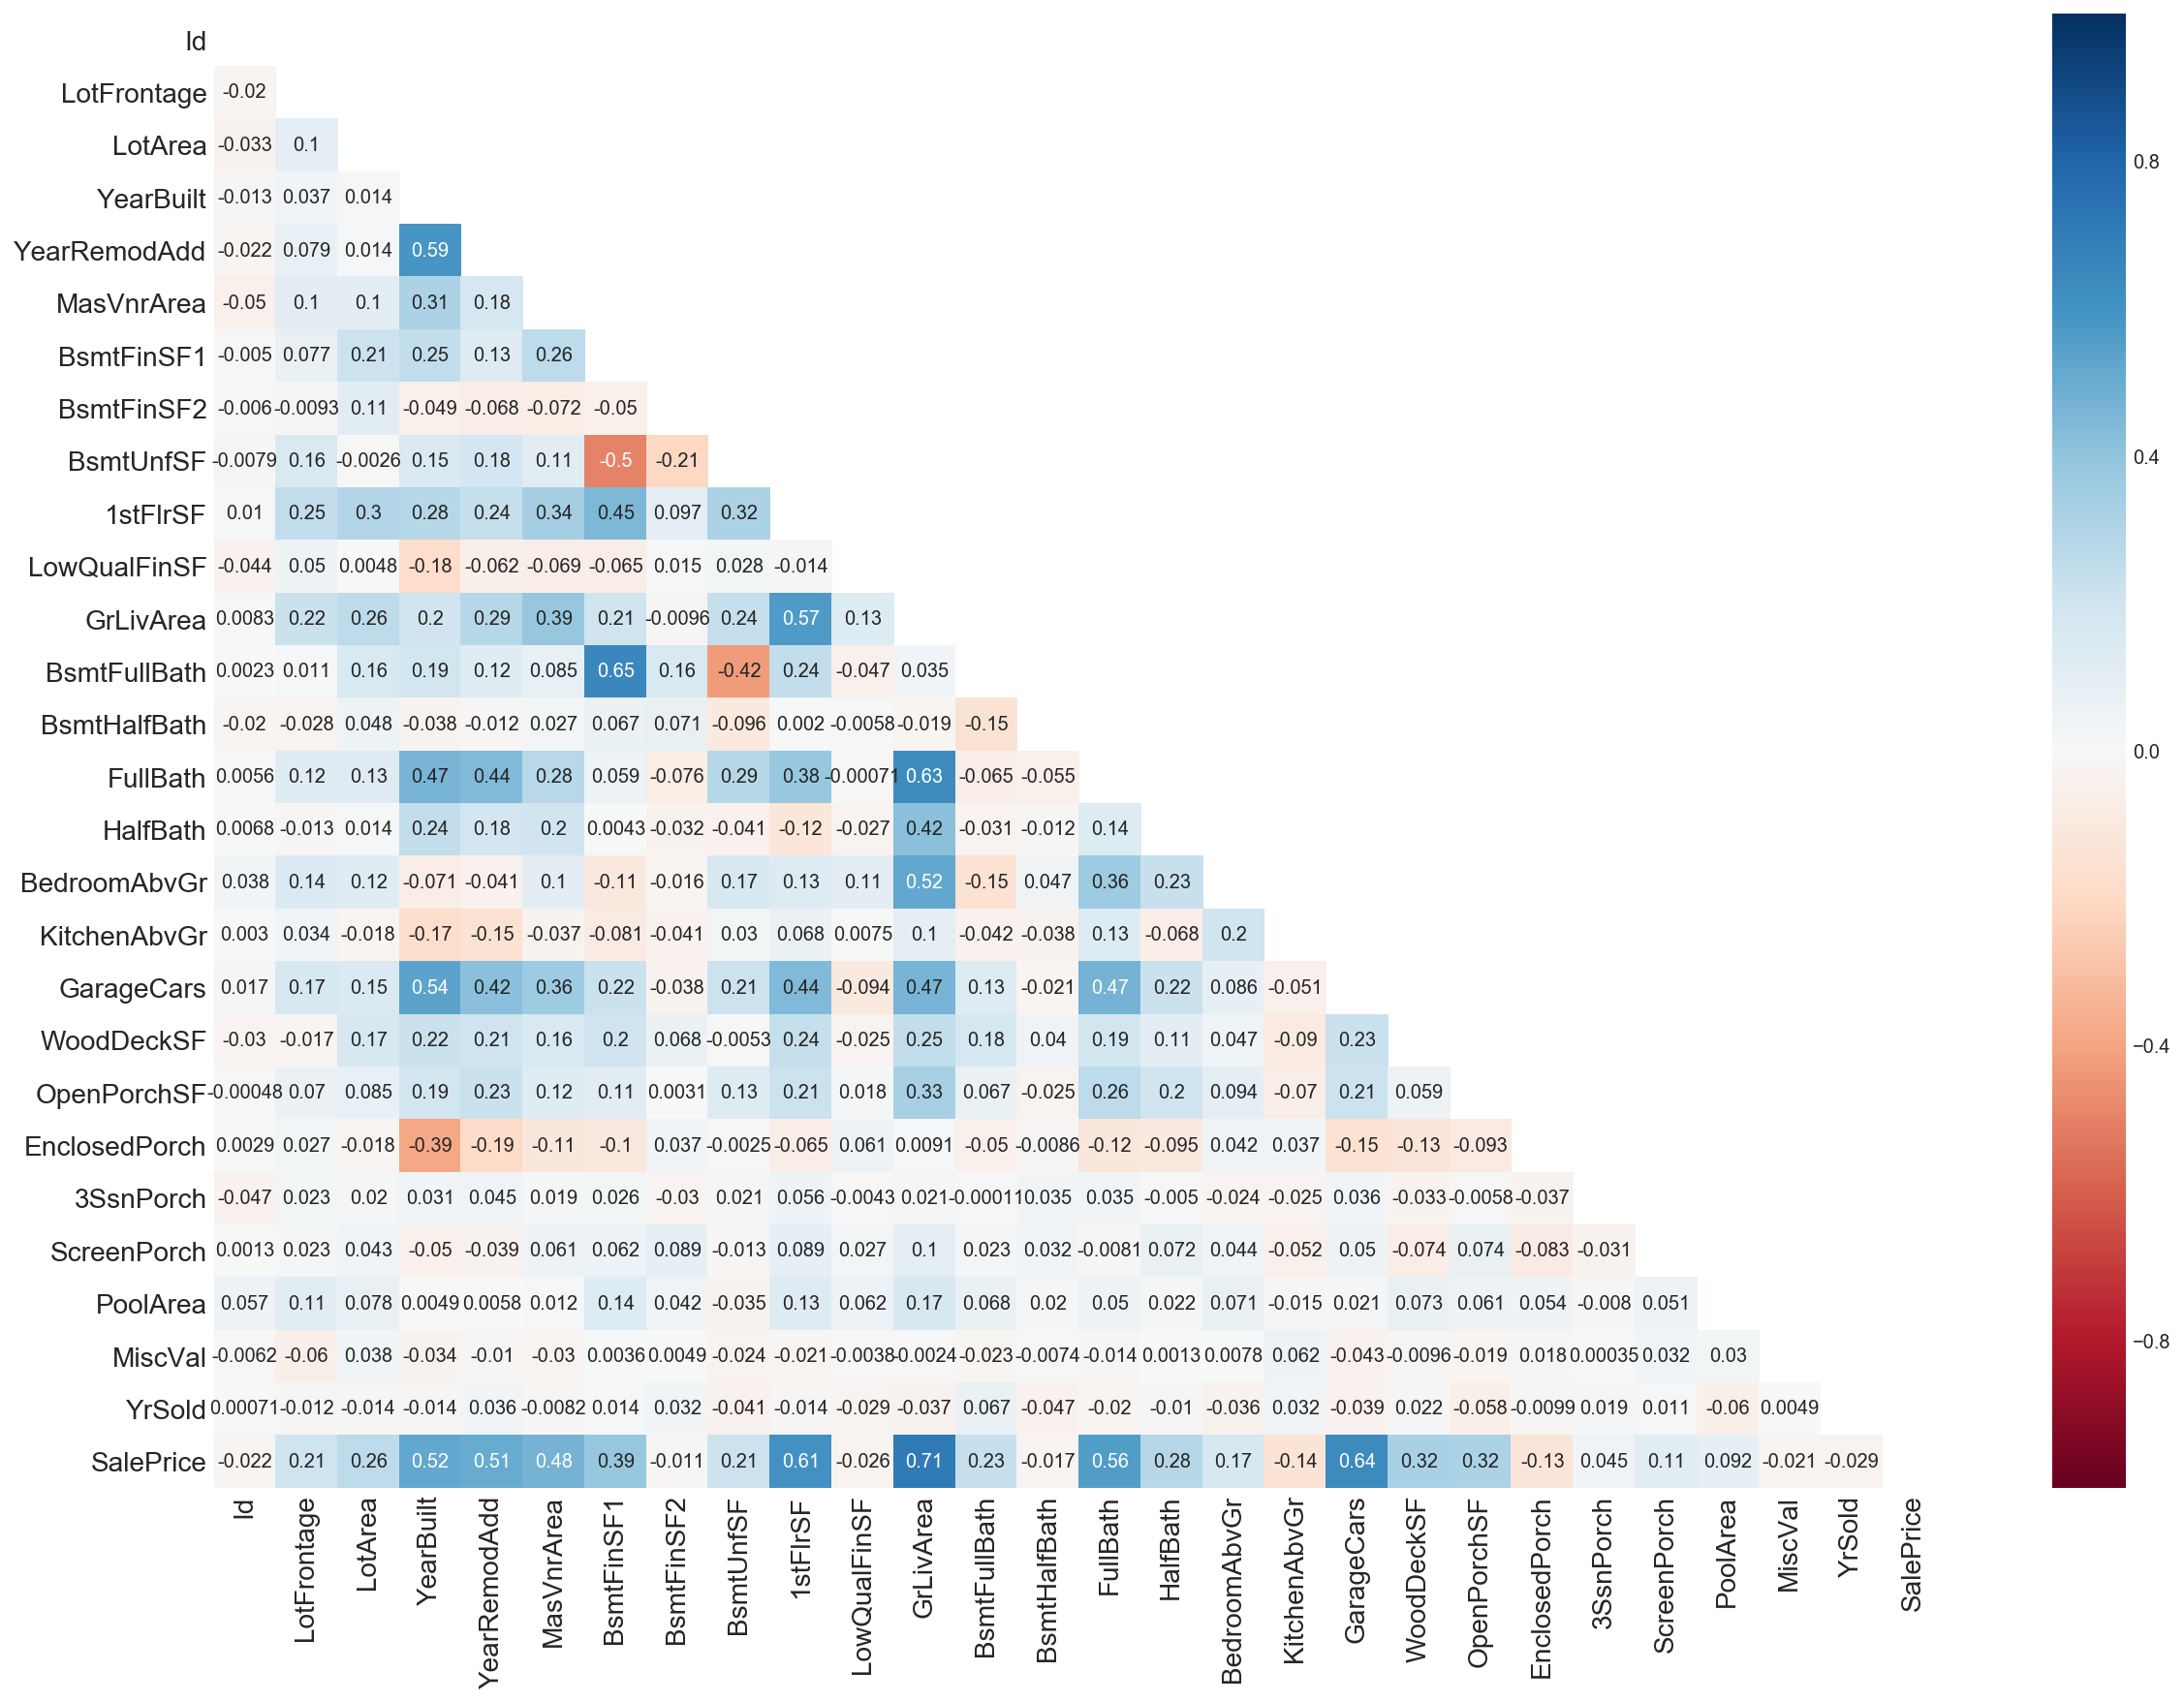

In [36]:
# change df to your DataFrame name. if needed, drop columns here.
mean_corr = fixed_df.corr()
# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(20,14))
# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)
# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()



Based on above correlation we will see all predictor that have correlation more than 0.3%

In [49]:
check_corr = mean_corr['SalePrice'].sort_values(ascending=False)
check_corr

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
1stFlrSF         0.605852
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

EDA ON Categorical Variable

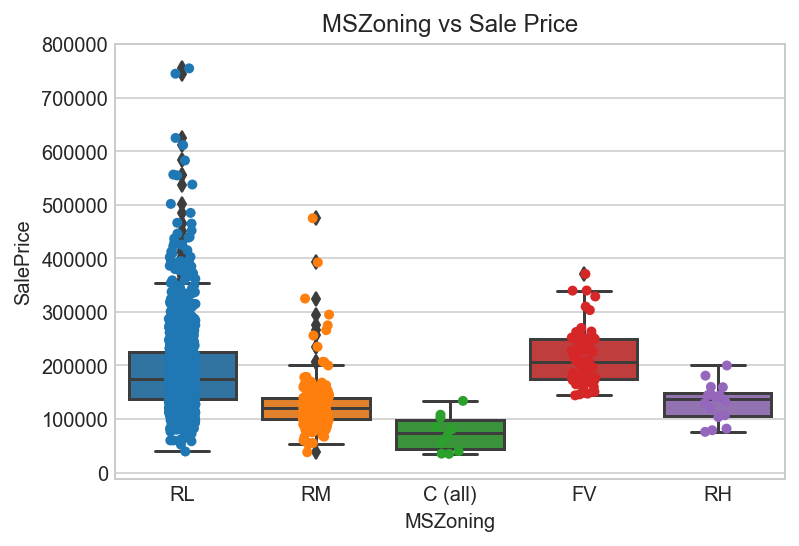

In [65]:
# MS Zoning vs Sale price
ax = sns.boxplot(x="MSZoning", y="SalePrice", 
                data=fixed_df)
ax = sns.stripplot(x="MSZoning", y="SalePrice",
                   data=fixed_df, jitter=True,
                   edgecolor="gray")
plt.title("MSZoning vs Sale Price",fontsize=12)

we can see that residential low density area (RL) and Floating Village Residential (FV) tend to have higher price

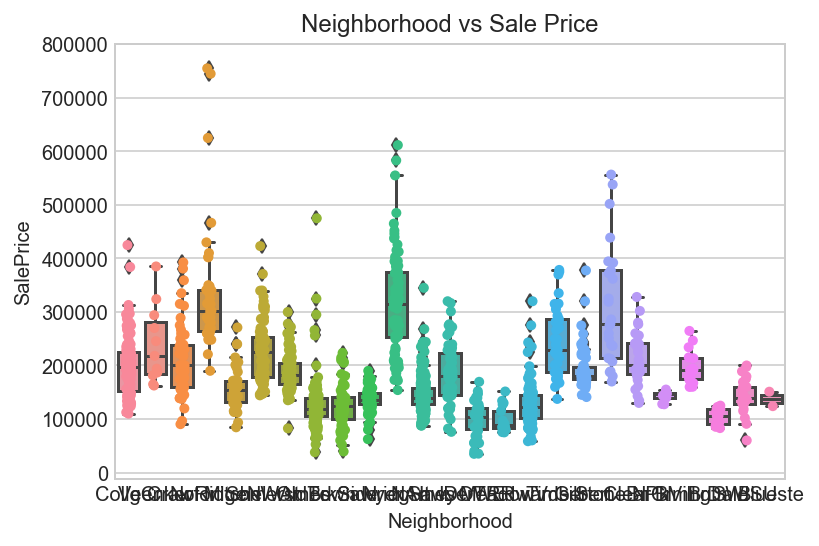

In [66]:
# Sale Price Across Different Neighbors
ax = sns.boxplot(x="Neighborhood", y="SalePrice", 
                data=fixed_df)
ax = sns.stripplot(x="Neighborhood", y="SalePrice",
                   data=fixed_df, jitter=True,
                   edgecolor="gray")
plt.title("Neighborhood vs Sale Price",fontsize=12);

It appears that certain neighborhoods sell for more than others. The distribution of prices make sense here as there should be varying prices with certain neighborhoods clearly valued higher.

In [29]:
#import prediction libraries
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error , mean_squared_log_error

Preparing dataset


In [69]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(x_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(x_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print("Root Mean Squared Error: {}".format(rmse))
rmsloge= reg_all.mean_squared_log_error(y_true, y_pred)
print("Root Mean Square Log Error: {}".format(rmsloge))

NameError: name 'x_train' is not defined